In [1]:
import json
import pandas as pd
import os
from os import listdir, getcwd, chdir
from os.path import isfile, join
import csv
from data_separation import read_feature, filter_feature, remove_nans_feature, put_together

In [2]:
json_path = '/Users/khanhha/mpt-statistical-testing/MPTData/15_models_10_percent.json'
msd_path = '/Users/khanhha/mpt-statistical-testing/MPTData/msd_data'
feature_path = '/Users/khanhha/mpt-statistical-testing/MPTData/feature_data'

## Data Quality Sort

In [3]:
with open(json_path) as json_file:
    json_data = json.load(json_file)

In [4]:
feature_list = [
    'alpha', # Fitted anomalous diffusion alpha exponenet
    'D_fit', # Fitted anomalous diffusion coefficient
    'kurtosis', # Kurtosis of track
    'asymmetry1', # Asymmetry of trajecory (0 for circular symmetric, 1 for linear)
    'asymmetry2', # Ratio of the smaller to larger principal radius of gyration
    'asymmetry3', # An asymmetric feature that accnts for non-cylindrically symmetric pt distributions
    'AR', # Aspect ratio of long and short side of trajectory's minimum bounding rectangle
    'elongation', # Est. of amount of extension of trajectory from centroid
    'boundedness', # How much a particle with Deff is restricted by a circular confinement of radius r
    'fractal_dim', # Measure of how complicated a self similar figure is
    'trappedness', # Probability that a particle with Deff is trapped in a region
    'efficiency', # Ratio of squared net displacement to the sum of squared step lengths
    'straightness', # Ratio of net displacement to the sum of squared step lengths
    'MSD_ratio', # MSD ratio of the track
#     'frames', # Number of frames the track spans
    'Deff1', # Effective diffusion coefficient at 0.33 s
    'Deff2', # Effective diffusion coefficient at 3.3 s
    'Mean alpha', 
    'Mean D_fit', 
    'Mean kurtosis', 
    'Mean asymmetry1', 
    'Mean asymmetry2',
    'Mean asymmetry3', 
    'Mean AR',
    'Mean elongation', 
    'Mean boundedness',
    'Mean fractal_dim', 
    'Mean trappedness', 
    'Mean efficiency',
    'Mean straightness', 
    'Mean MSD_ratio', 
    'Mean Deff1', 
    'Mean Deff2',
    ]

In [5]:
feature_files = [f for f in listdir(feature_path) if isfile(join(feature_path, f)) and '.csv' in f and 'P' in f]

In [6]:
data_quality = put_together(
    json_data,
    feature_list,
    feature_path,
    feature_files
)

In [9]:
# data_quality

## Put together functions

### Plot trajectories of all particles in 1 video
Input the video code of interest.

In [10]:
# def video_quality_map(feature_path, msd_path, json_path, vid_code):
#     ''' Plot trajectories of particles in 1 video:
#     INPUTs:
#         'feature_path' - path to directory containing feature data files
#         'msd_path' - path to directory containing msd files
#         'json_path' - path to json file
#         'vid_code' - code name of the video of interest (ex: 'P14_40nm_s1_v3')
#     '''
    
#     from data_separation import read_feature, filter_feature, remove_nans_feature, put_together    
#     from os import listdir, getcwd, chdir
#     from os.path import isfile, join
#     import json
#     import pandas as pd
#     # Sort the data into categories: high, low, medium
    
#     with open(json_path) as json_file:
#         json_data = json.load(json_file)
    
#     feature_list = [
#     'alpha', # Fitted anomalous diffusion alpha exponenet
#     'D_fit', # Fitted anomalous diffusion coefficient
#     'kurtosis', # Kurtosis of track
#     'asymmetry1', # Asymmetry of trajecory (0 for circular symmetric, 1 for linear)
#     'asymmetry2', # Ratio of the smaller to larger principal radius of gyration
#     'asymmetry3', # An asymmetric feature that accnts for non-cylindrically symmetric pt distributions
#     'AR', # Aspect ratio of long and short side of trajectory's minimum bounding rectangle
#     'elongation', # Est. of amount of extension of trajectory from centroid
#     'boundedness', # How much a particle with Deff is restricted by a circular confinement of radius r
#     'fractal_dim', # Measure of how complicated a self similar figure is
#     'trappedness', # Probability that a particle with Deff is trapped in a region
#     'efficiency', # Ratio of squared net displacement to the sum of squared step lengths
#     'straightness', # Ratio of net displacement to the sum of squared step lengths
#     'MSD_ratio', # MSD ratio of the track
# #     'frames', # Number of frames the track spans
#     'Deff1', # Effective diffusion coefficient at 0.33 s
#     'Deff2', # Effective diffusion coefficient at 3.3 s
#     'Mean alpha', 
#     'Mean D_fit', 
#     'Mean kurtosis', 
#     'Mean asymmetry1', 
#     'Mean asymmetry2',
#     'Mean asymmetry3', 
#     'Mean AR',
#     'Mean elongation', 
#     'Mean boundedness',
#     'Mean fractal_dim', 
#     'Mean trappedness', 
#     'Mean efficiency',
#     'Mean straightness', 
#     'Mean MSD_ratio', 
#     'Mean Deff1', 
#     'Mean Deff2',
#     ]

#     feature_files = [f for f in listdir(feature_path) if isfile(join(feature_path, f)) and '.csv' in f and 'P' in f]

#     # Apply put_together:
#     data_quality = put_together(json_data,feature_list,feature_path,feature_files)
#     feature1 = data_quality['features_' + vid_code]

#     # Import msd file:
#     msd_files = [f for f in listdir(msd_path) if isfile(join(msd_path, f)) and '.csv' in f and 'P' in f]
#     msd_data = read_feature(msd_path, msd_files)
#     msd1 = msd_data['msd_' + vid_code]

#     # Color coded the X Y based on quality sort
#     # green-high, yellow-medium, red-low, purple-NaN
    
#     # Merge feature quality and msd into 1 table
#     feature2 = feature1[['Track_ID','Category']]
#     df = pd.merge(msd1, feature2, on='Track_ID', how='left')

#     # Separate data based on Category
#     low_Y = df[df['Category'] == 'low']
#     med_Y = df[df['Category'] == 'medium']
#     high_Y = df[df['Category'] == 'high']
#     null_Y = df[df['Category'] == None]
    
#     # Plot
#     import matplotlib.pyplot as plt
#     plt.figure(figsize = (10,10))
        
#     plt.plot(low_Y['X'], low_Y['Y'], color='red', label='Low')
#     plt.plot(med_Y['X'], med_Y['Y'], color='yellow', label='Medium')
#     plt.plot(high_Y['X'], high_Y['Y'], color='green', label='High')
#     plt.plot(null_Y['X'], null_Y['Y'], color='grey', label='Unclassified')
    
#     plt.legend()
#     plt.title('Trajectories of Particles in Video ' + vid_code)
#     plt.show()

In [11]:
# from video_quality_map import video_quality_map
# json_path = '/Users/khanhha/mpt-statistical-testing/MPTData/15_models_10_percent.json'
# msd_path = '/Users/khanhha/mpt-statistical-testing/MPTData/msd_data'
# feature_path = '/Users/khanhha/mpt-statistical-testing/MPTData/feature_data'

# vid_code = 'P70_40nm_s1_v1'
# video_quality_map(feature_path, msd_path, json_path, vid_code)

## Trajectory video quality map for 1 VIDEO

### Done

In [11]:
# from video_quality_map import video_quality_map
json_path = '/Users/khanhha/mpt-statistical-testing/MPTData/15_models_10_percent.json'
msd_path = '/Users/khanhha/mpt-statistical-testing/MPTData/msd_data'
feature_path = '/Users/khanhha/mpt-statistical-testing/MPTData/feature_data'

vid_code = 'P14_40nm_s1_v1'
# video_quality_map(feature_path, msd_path, json_path, vid_code)

In [12]:
# # def video_quality_map(feature_path, msd_path, json_path, vid_code):

# ''' Plot trajectories of particles in 1 video:
# INPUTs:
#     'feature_path' - path to directory containing feature data files
#     'msd_path' - path to directory containing msd files
#     'json_path' - path to json file
#     'vid_code' - code name of the video of interest (ex: 'P14_40nm_s1_v3')
# '''

# from data_separation import read_feature, filter_feature, remove_nans_feature, put_together    
# from os import listdir, getcwd, chdir
# from os.path import isfile, join
# import json
# import pandas as pd
# # Sort the data into categories: high, low, medium

# with open(json_path) as json_file:
#     json_data = json.load(json_file)

# feature_list = [
# 'alpha', # Fitted anomalous diffusion alpha exponenet
# 'D_fit', # Fitted anomalous diffusion coefficient
# 'kurtosis', # Kurtosis of track
# 'asymmetry1', # Asymmetry of trajecory (0 for circular symmetric, 1 for linear)
# 'asymmetry2', # Ratio of the smaller to larger principal radius of gyration
# 'asymmetry3', # An asymmetric feature that accnts for non-cylindrically symmetric pt distributions
# 'AR', # Aspect ratio of long and short side of trajectory's minimum bounding rectangle
# 'elongation', # Est. of amount of extension of trajectory from centroid
# 'boundedness', # How much a particle with Deff is restricted by a circular confinement of radius r
# 'fractal_dim', # Measure of how complicated a self similar figure is
# 'trappedness', # Probability that a particle with Deff is trapped in a region
# 'efficiency', # Ratio of squared net displacement to the sum of squared step lengths
# 'straightness', # Ratio of net displacement to the sum of squared step lengths
# 'MSD_ratio', # MSD ratio of the track
# #     'frames', # Number of frames the track spans
# 'Deff1', # Effective diffusion coefficient at 0.33 s
# 'Deff2', # Effective diffusion coefficient at 3.3 s
# 'Mean alpha', 
# 'Mean D_fit', 
# 'Mean kurtosis', 
# 'Mean asymmetry1', 
# 'Mean asymmetry2',
# 'Mean asymmetry3', 
# 'Mean AR',
# 'Mean elongation', 
# 'Mean boundedness',
# 'Mean fractal_dim', 
# 'Mean trappedness', 
# 'Mean efficiency',
# 'Mean straightness', 
# 'Mean MSD_ratio', 
# 'Mean Deff1', 
# 'Mean Deff2',
# ]

# feature_files = [f for f in listdir(feature_path) if isfile(join(feature_path, f)) and '.csv' in f and 'P' in f]

# # Apply put_together:
# data_quality = put_together(json_data,feature_list,feature_path,feature_files)



feature1 = data_quality['features_' + vid_code]

# Import msd file:
msd_files = [f for f in listdir(msd_path) if isfile(join(msd_path, f)) and '.csv' in f and 'P' in f]
msd_data = read_feature(msd_path, msd_files)
msd1 = msd_data['msd_' + vid_code]

# Color coded the X Y based on quality sort
# green-high, yellow-medium, red-low, purple-NaN

# Merge feature quality and msd into 1 table
feature2 = feature1[['Track_ID','Category']]
df = pd.merge(msd1, feature2, on='Track_ID', how='left')

# Separate data based on Category
low_Y = df[df['Category'] == 'low']
med_Y = df[df['Category'] == 'medium']
high_Y = df[df['Category'] == 'high']
null_Y = df[df['Category'] == None]



### Plot full trajectory qualities of ALL particles in ONE VIDEO

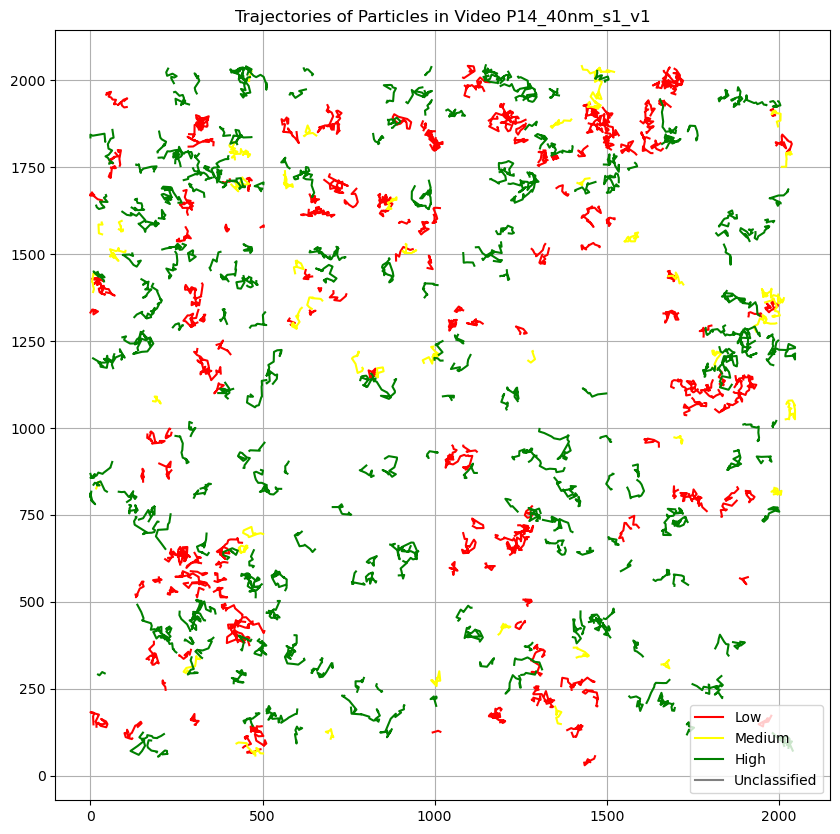

In [13]:
# Plot
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
    
plt.plot(low_Y['X'], low_Y['Y'], color='red', label='Low')
plt.plot(med_Y['X'], med_Y['Y'], color='yellow', label='Medium')
plt.plot(high_Y['X'], high_Y['Y'], color='green', label='High')
plt.plot(null_Y['X'], null_Y['Y'], color='grey', label='Unclassified')

plt.grid(True)

plt.legend()
plt.title('Trajectories of Particles in Video ' + vid_code)
plt.show()
# plt.savefig('trajectories_of_' + vid_code + '.png')

### Zoom into the section of interest of the PLOT ABOVE

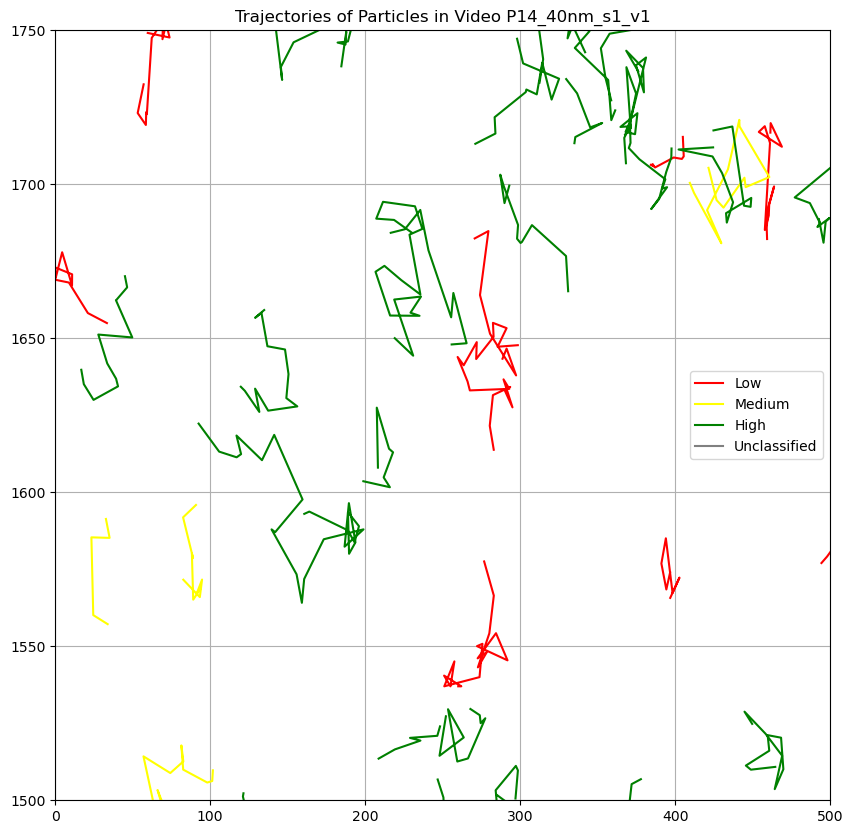

In [14]:
# WRite code to zoom into the section of interested
x_range = [0,500]
y_range = [1500,1750]

plt.figure(figsize = (10,10))
    
plt.plot(low_Y['X'], low_Y['Y'], color='red', label='Low')
plt.plot(med_Y['X'], med_Y['Y'], color='yellow', label='Medium')
plt.plot(high_Y['X'], high_Y['Y'], color='green', label='High')
plt.plot(null_Y['X'], null_Y['Y'], color='grey', label='Unclassified')

plt.legend()
plt.title('Trajectories of Particles in Video ' + vid_code)

# Zoom into only an area of interested of the plot
plt.xlim(x_range[0],x_range[1])
plt.ylim(y_range[0],y_range[1])

plt.grid(True)

plt.show()

### Filter to look at low/medium/high

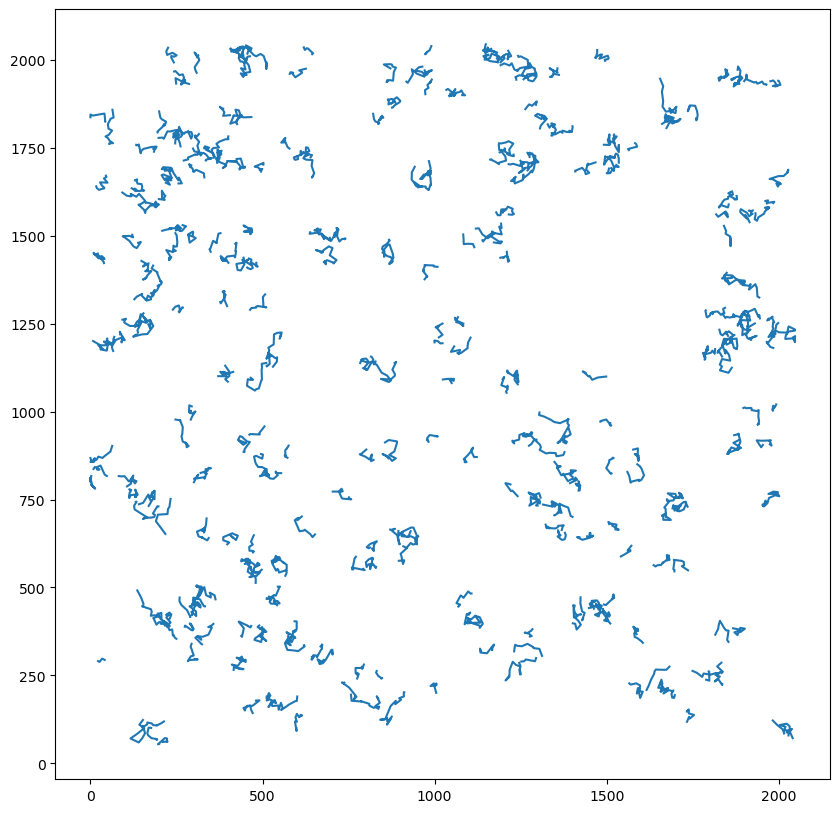

In [15]:
# Filtered Data - high
# high_Y
track_id = 1
particle = high_Y[high_Y['Track_ID'] == 1]


plt.figure(figsize = (10,10))
plt.plot(high_Y['X'], high_Y['Y'])

### Gauss Values between low/med/high

In [129]:
gauss_low = low_Y['Gauss']
gauss_med = med_Y['Gauss']
gauss_high = high_Y['Gauss']

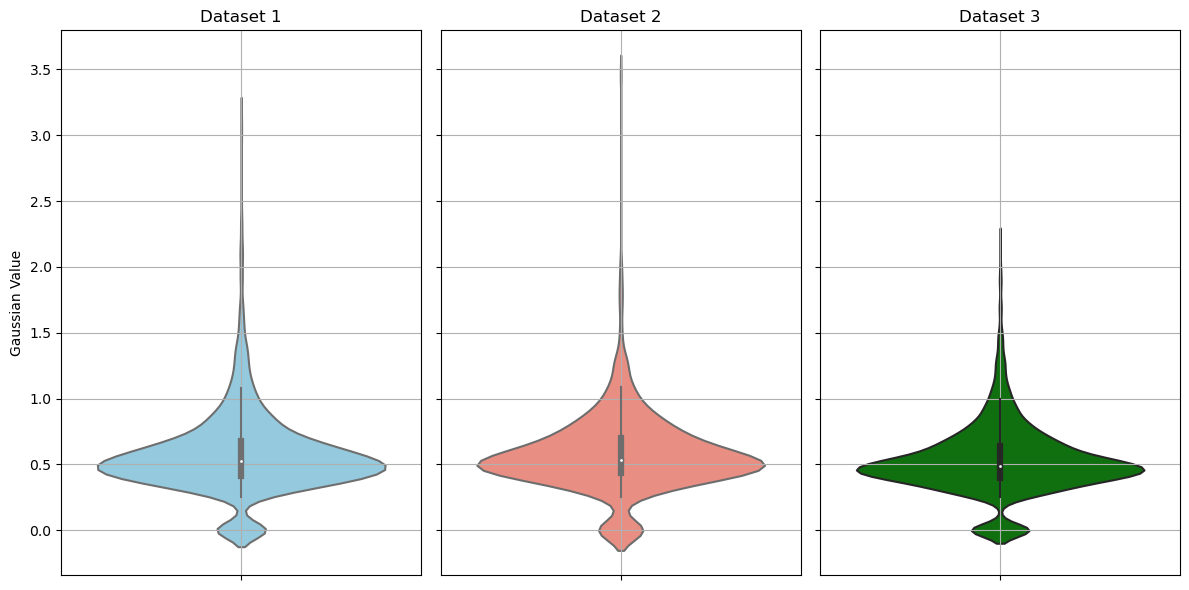

In [130]:
# Plot
import matplotlib.pyplot as plt
import seaborn as sns

# plt.figure(figsize = (10,10))

# Create a figure with two subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 6), sharey=True)

# First subplot: Violin plot for dataset 1
sns.violinplot(y=gauss_low, ax=axs[0], color='skyblue')
axs[0].set_title('Dataset 1')
axs[0].set_ylabel('Gaussian Value')
axs[0].grid(True)

# Second subplot: Violin plot for dataset 2
sns.violinplot(y=gauss_med, ax=axs[1], color='salmon')
axs[1].set_title('Dataset 2')
axs[1].set_ylabel('')  # Remove y-axis label for better clarity
axs[1].grid(True)

# Third subplot: Violin plot for dataset 3
sns.violinplot(y=gauss_high, ax=axs[2], color='green')
axs[2].set_title('Dataset 3')
axs[2].set_ylabel('')
axs[2].grid(True)


# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

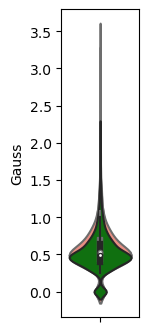

In [131]:
plt.figure(figsize = (1,4))

sns.violinplot(y=gauss_low, color='skyblue', alpha = 0.5)
sns.violinplot(y=gauss_med, color='salmon', alpha = 0.5)
sns.violinplot(y=gauss_high, color='green', alpha = 0.5)


plt.show()

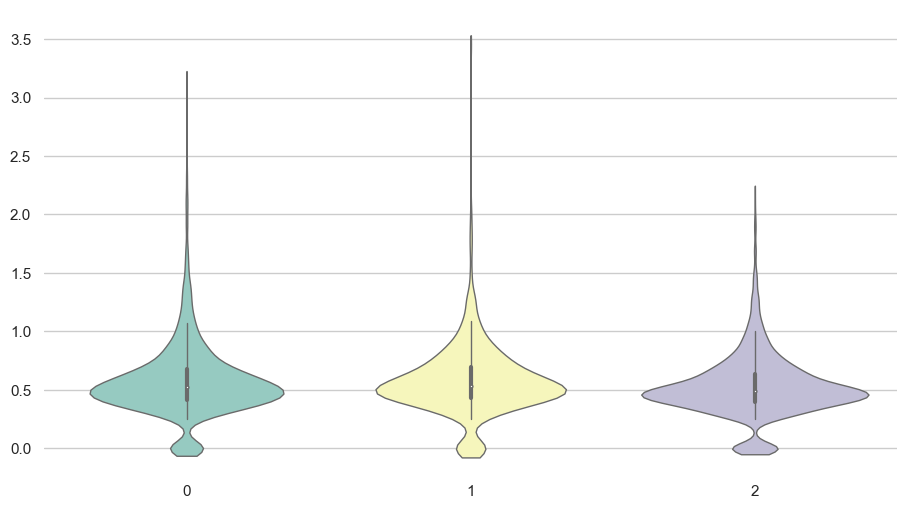

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

corr_df = [gauss_low, gauss_med, gauss_high]
# # Load the example dataset of brain network correlations
# df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# # Pull out a specific subset of networks
# used_networks = [1, 3, 4, 5, 6, 7, 8, 11, 12, 13, 16, 17]
# used_columns = (df.columns.get_level_values("network")
#                           .astype(int)
#                           .isin(used_networks))
# df = df.loc[:, used_columns]

# # Compute the correlation matrix and average over networks
# corr_df = df.corr().groupby(level="network").mean()
# corr_df.index = corr_df.index.astype(int)
# corr_df = corr_df.sort_index().T

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))

# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=corr_df, bw_adjust=.5, cut=1, linewidth=1, palette="Set3")

# Finalize the figure
ax.set(ylim=(-.2, 3.75))
sns.despine(left=True, bottom=True)


In [143]:
import seaborn as sns
sns.set_theme(style="whitegrid", palette="muted")

# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=df, x="Gauss", y="Category", hue="species")
ax.set(ylabel="")
df

ValueError: Could not interpret value `species` for parameter `hue`

## Look at differences between videos

Numbers of trajectories between different videos at different ages?

#### Extracting VIDEO CODES:

In [16]:
# Extracting VIDEO CODES:

# Create empty var
vid_codes = []
# Iterate over each file in feature
for f1 in os.listdir(feature_path):
    
    # Extract the tail in feature file
    feature_tail = f1.split('_',1)[1].split('.')[0]
    
    # Iterate over each file in msd
    for f2 in os.listdir(msd_path):
        
        # Extract the tail in msd file
        msd_tail = f2.split('_',1)[1].split('.')[0]

        # If tails are the same
        if feature_tail == msd_tail:

            # Add tail into video_codes list
            vid_codes.append(msd_tail)
vid_codes.sort()
# vid_codes

In [18]:
# data_quality['features_P35_brain_2_slice_1_vid_1'].drop(columns = ['X','Y'])
# # msd_data

In [19]:
merge_data = {}
for code in vid_codes:
    merge_data[code] = pd.merge(msd_data['msd_' + code], data_quality['features_' + code].drop(columns=['X','Y']), on='Track_ID', how='left')

In [58]:
# merge_data

In [65]:
qualities = {}
for code in vid_codes:
    quality = data_quality['features_' + code]['Quality'].mean()
    if quality < 0.333:
        qualities[code] = 


In [59]:
qualities

{'P14_40nm_s1_v1': 0.5613972764949675,
 'P14_40nm_s1_v2': 0.316583912611718,
 'P14_40nm_s1_v3': 0.2726829268292683,
 'P14_40nm_s1_v4': 0.6886597938144331,
 'P14_40nm_s1_v5': 0.6747967479674797,
 'P14_40nm_s2_v1': 0.474702380952381,
 'P14_40nm_s2_v2': 0.4398447606727037,
 'P14_40nm_s2_v3': 0.67125,
 'P14_40nm_s2_v4': 0.7084848484848485,
 'P14_40nm_s2_v5': 0.6836805555555556,
 'P14_40nm_s3_v1': 0.3630853994490358,
 'P14_40nm_s3_v2': 0.318673647469459,
 'P14_40nm_s3_v3': 0.38455284552845537,
 'P14_40nm_s3_v5': 0.395632183908046,
 'P21_40nm_s1_v1': 0.6398734177215191,
 'P21_40nm_s1_v2': 0.755415130770581,
 'P21_40nm_s1_v3': 0.7406374501992032,
 'P21_40nm_s1_v4': 0.40043050430504307,
 'P21_40nm_s1_v5': 0.779939819458375,
 'P21_40nm_s2_v1': 0.6009170105456212,
 'P21_40nm_s2_v2': 0.5739644970414202,
 'P21_40nm_s2_v3': 0.4209677419354839,
 'P21_40nm_s2_v4': 0.5464751263633946,
 'P21_40nm_s2_v5': 0.5703290414878398,
 'P21_40nm_s3_v1': 0.6267995570321152,
 'P21_40nm_s3_v2': 0.6089625537139349,
 

In [ ]:
# Look at the quality metric 
# percentage of qualities in 1 video - bar chart



In [45]:
# plt.plot(data['Video'],data['Quality'])

if 
    data['Age'] = 

,Video,Quality
0,P14_40nm_s1_v1,high
1,P14_40nm_s1_v2,low
2,P14_40nm_s1_v3,low
3,P14_40nm_s1_v4,high
4,P14_40nm_s1_v5,high
...,...,...
68,P70_40nm_s3_v1,high
69,P70_40nm_s3_v2,high
70,P70_40nm_s3_v3,high
71,P70_40nm_s3_v4,high


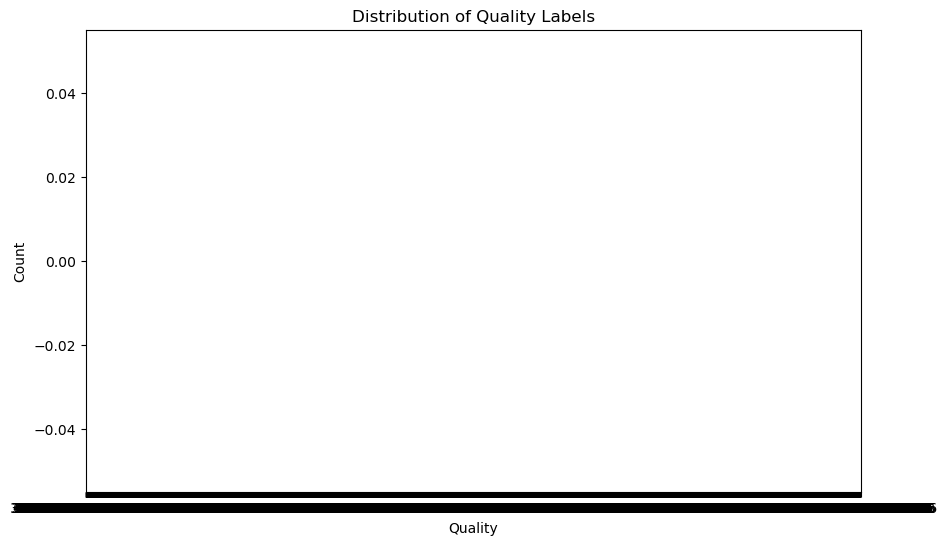

In [39]:
import seaborn as sns

# Convert dictionary to DataFrame
data = pd.DataFrame(list(qualities.items()), columns=['Video', 'Quality'])


In [ ]:
# Extract high quality data
for video in vid_codes:
    high_quality 

#### Define vid codes into different age groups

In [234]:
P14_vids = ['P14_40nm_s1_v1',
            'P14_40nm_s1_v2',
            'P14_40nm_s1_v3',
            'P14_40nm_s1_v4',
            'P14_40nm_s1_v5',
            'P14_40nm_s2_v1',
            'P14_40nm_s2_v2',
            'P14_40nm_s2_v3',
            'P14_40nm_s2_v4',
            'P14_40nm_s2_v5',
            'P14_40nm_s3_v1',
            'P14_40nm_s3_v2',
            'P14_40nm_s3_v3',
            'P14_40nm_s3_v5']
P21_vids = ['P21_40nm_s1_v1',
            'P21_40nm_s1_v2',
            'P21_40nm_s1_v3',
            'P21_40nm_s1_v4',
            'P21_40nm_s1_v5',
            'P21_40nm_s2_v1',
            'P21_40nm_s2_v2',
            'P21_40nm_s2_v3',
            'P21_40nm_s2_v4',
            'P21_40nm_s2_v5',
            'P21_40nm_s3_v1',
            'P21_40nm_s3_v2',
            'P21_40nm_s3_v3',
            'P21_40nm_s3_v4',
            'P21_40nm_s3_v5']
P28_vids = ['P28_40nm_s1_v1',
            'P28_40nm_s1_v2',
            'P28_40nm_s1_v3',
            'P28_40nm_s1_v4',
            'P28_40nm_s1_v5',
            'P28_40nm_s2_v1',
            'P28_40nm_s2_v2',
            'P28_40nm_s2_v3',
            'P28_40nm_s2_v4',
            'P28_40nm_s2_v5',
            'P28_40nm_s3_v1',
            'P28_40nm_s3_v2',
            'P28_40nm_s3_v4',
            'P28_40nm_s3_v5']
P35_vids = ['P35_brain_2_slice_1_vid_1',
            'P35_brain_2_slice_1_vid_2',
            'P35_brain_2_slice_1_vid_3',
            'P35_brain_2_slice_1_vid_4',
            'P35_brain_2_slice_1_vid_5',
            'P35_brain_2_slice_2_vid_1',
            'P35_brain_2_slice_2_vid_2',
            'P35_brain_2_slice_2_vid_3',
            'P35_brain_2_slice_2_vid_4',
            'P35_brain_2_slice_2_vid_5',
            'P35_brain_2_slice_3_vid_1',
            'P35_brain_2_slice_3_vid_2',
            'P35_brain_2_slice_3_vid_3',
            'P35_brain_2_slice_3_vid_4',
            'P35_brain_2_slice_3_vid_5']
P70_vids = ['P70_40nm_s1_v1',
            'P70_40nm_s1_v2',
            'P70_40nm_s1_v3',
            'P70_40nm_s1_v4',
            'P70_40nm_s1_v5',
            'P70_40nm_s2_v1',
            'P70_40nm_s2_v2',
            'P70_40nm_s2_v3',
            'P70_40nm_s2_v4',
            'P70_40nm_s2_v5',
            'P70_40nm_s3_v1',
            'P70_40nm_s3_v2',
            'P70_40nm_s3_v3',
            'P70_40nm_s3_v4',
            'P70_40nm_s3_v5']
ages = {'P14_vids':[P14_vids],
        'P21_vids':[P21_vids],
        'P28_vids':[P28_vids],
        'P35_vids':[P35_vids],
        'P70_vids':[P70_vids]}

#### Testing different plots

In [272]:
def count_particles(age_vids):
    P70_data = {}
    P70_particles = 0
    for name in age_vids:
        P70_data[name] = merge_data[name]
        P70_particles += len(P70_data[name]['Track_ID'].unique())
    return [P70_particles, P70_data]

In [265]:
[P70_particles, P70_data] = count_particles(P70_vids)
[P35_particles, P35_data] = count_particles(P35_vids)
[P28_particles, P28_data] = count_particles(P28_vids)
[P21_particles, P21_data] = count_particles(P21_vids)
[P14_particles, P14_data] = count_particles(P14_vids)

In [274]:
P70_data['P70_40nm_s1_v1'].keys()

Index(['Unnamed: 0', 'Frame', 'Gauss', 'MSDs', 'Mean_Intensity', 'Quality_x',
       'SN_Ratio', 'Track_ID', 'X_x', 'Y_x', 'alpha', 'D_fit', 'kurtosis',
       'asymmetry1', 'asymmetry2', 'asymmetry3', 'AR', 'elongation',
       'boundedness', 'fractal_dim', 'trappedness', 'efficiency',
       'straightness', 'MSD_ratio', 'Deff1', 'Deff2', 'Mean alpha',
       'Mean D_fit', 'Mean kurtosis', 'Mean asymmetry1', 'Mean asymmetry2',
       'Mean asymmetry3', 'Mean AR', 'Mean elongation', 'Mean boundedness',
       'Mean fractal_dim', 'Mean trappedness', 'Mean efficiency',
       'Mean straightness', 'Mean MSD_ratio', 'Mean Deff1', 'Mean Deff2',
       'X_y', 'Y_y', 'frames', 'Quality_y', 'Category'],
      dtype='object')

/Users/khanhha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


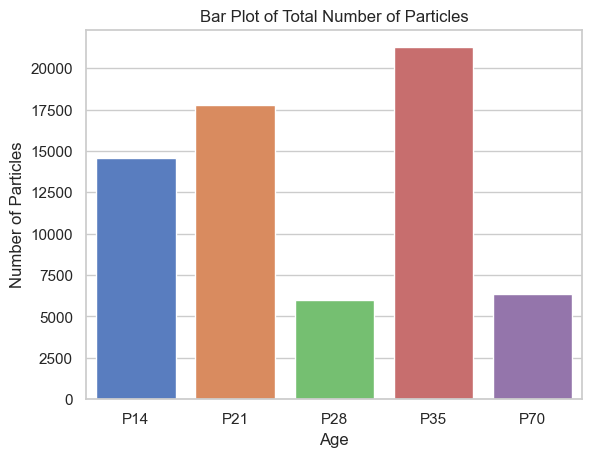

In [271]:
age = ['P14','P21','P28','P35','P70']
particles = [P70_particles,
             P35_particles,
             P28_particles,
             P21_particles, 
             P14_particles]

# Create bar plot
sns.barplot(x=age, y=particles)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Number of Particles')
plt.title('Bar Plot of Total Number of Particles')

# Show the plot
plt.show()

In [240]:
particles = {}
for age in ages:
    print(age)
    break
    for name in age:
        print(name)
        break
        particles[age] += len(merge_data[name]['Track_ID'].unique())

P14_vids


In [ ]:
particles

#### Continued

In [75]:
# # How to visualize the differences among different videos in one age group 
# # P70_vids
# P70_vids_5 = P70_vids[:5]
# for code in P70_vids_5:
#     df[code] = merge_data(feature_path, msd_path, json_path, code)

In [146]:
# # df
# # P70_vids_5
# df['P70_40nm_s1_v1']

In [212]:
# # df11 = df['P70_40nm_s1_v1']
# df11 = df

# plt.figure(figsize = (10,10))

# x = df11['X']
# y = df11['Y']
# gauss_val = df11['Gauss']


# import seaborn as sns
# import matplotlib.pyplot as plt

# # Create a DataFrame from the data
# data = {'X': x, 'Y': y, 'Gaussian Value': gauss_val}
# dfff = pd.DataFrame(data)

# # Create a scatter plot with Seaborn
# plt.figure(figsize=(8, 6))

# # sns.scatterplot(x='X', y='Y', data=dfff, hue='Gaussian Value', palette='viridis', size='Gaussian Value', alpha=0.8)
# # sns.jointplot(x='X', y='Y', data=dfff, kind='scatter')
# # sns.violinplot(x='Category', y='Gaussian Value', data=dfff)
# sns.violinplot(y=gauss_val, color='skyblue')  # Adjust color as needed


# # plt.xlabel('X-coordinate')
# # plt.ylabel('Y-coordinate')
# # plt.title('Particle Tracking with Gaussian Values')
# # plt.legend(title='Gaussian Value')
# plt.grid(True)
# plt.show()


## A lot of things below that I don't know what I did

In [12]:
vid_codes = ['P35_brain_2_slice_1_vid_1',
             'P35_brain_2_slice_1_vid_2',
             'P35_brain_2_slice_1_vid_3']

In [13]:
features = {}
for code in vid_codes:
    # features.append(data_quality['features_' + vid_codes[1]])
    features[code] = data_quality['features_' + code][['Track_ID','Category']]
# features

In [14]:
msd_files = [f for f in listdir(msd_path) if isfile(join(msd_path, f)) and '.csv' in f and 'P' in f]
msd_data = read_feature(msd_path, msd_files)


In [15]:
msds = {}
df = {}
for code in vid_codes:
    msds[code] = msd_data['msd_' + code][['Track_ID', 'X', 'Y', 'MSDs']]
    df[code] = pd.merge(msds[code], features[code],
                        on = 'Track_ID',
                        how = 'left')  
df1 = df[vid_codes[0]]
df2 = df[vid_codes[1]]
df3 = df[vid_codes[2]]

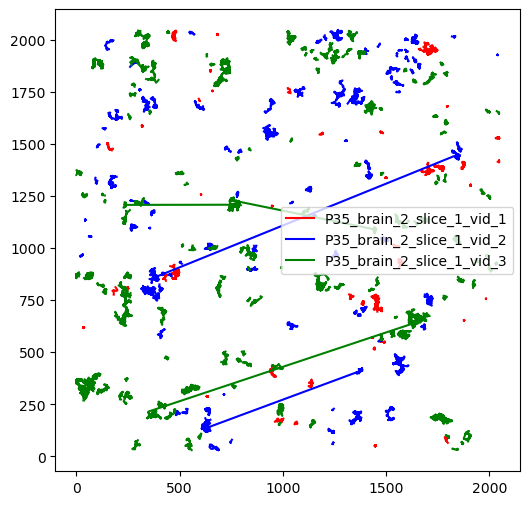

In [19]:
import matplotlib.pyplot as plt
qlt_plot = 'high'
colors = ['red',
          'blue',
          'green']
i = 0
plt.figure(figsize = (6,6))


for f in df:
    df1 = df[f]
    Y1 = df1[df1['Category'] == qlt_plot]['Y']
    X1 = df1[df1['Category'] == qlt_plot]['X']
    plt.plot(X1, Y1, color = colors[i], label = f)
    plt.legend()
    i += 1
    

In [69]:
# for df
low_Y1 = df1[df1['Category'] == 'low']
med_Y1 = df1[df1['Category'] == 'medium']
high_Y1 = df1[df1['Category'] == 'high']
null_Y1 = df1[df1['Category'] == None]

Y1 = df1['Y']
X1 = df1['X']

# for df2
Y2 = df2['Y']
X2 = df2['X']

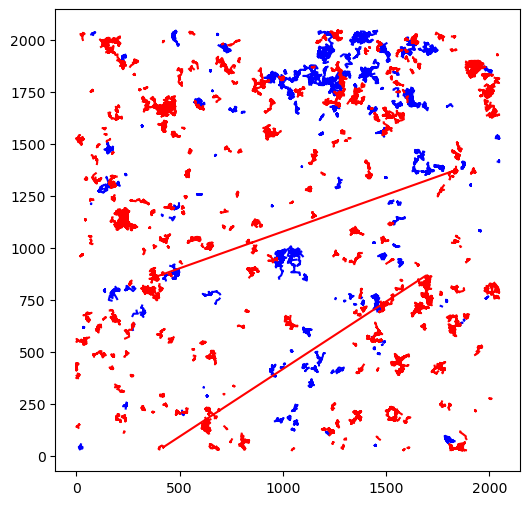

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize = (6,6))

plt.plot(X1, Y1, color = 'blue')
plt.plot(X2, Y2, color = 'red')
# Plot MSDs data among 3 videos 
# Plot X,Y (trajectories) of 3 videos on 1 plot


In [46]:
# Merge features and msds into 1 table

features1 = features[['Track_ID','Category']]
df = pd.merge(msd1, feature2, on='Track_ID', how='left')

TypeError: unhashable type: 'list'

In [45]:
# msd1 = msd_data['msd_' + vid_code]

In [15]:
# Color coded the X Y based on quality sort
# green-high, yellow-medium, red-low, purple-NaN

# Merge feature quality and msd into 1 table
feature2 = feature1[['Track_ID','Category']]
df = pd.merge(msd1, feature2, on='Track_ID', how='left')

In [16]:
low_Y = df[df['Category'] == 'low']
med_Y = df[df['Category'] == 'medium']
high_Y = df[df['Category'] == 'high']
null_Y = df[df['Category'] == None]

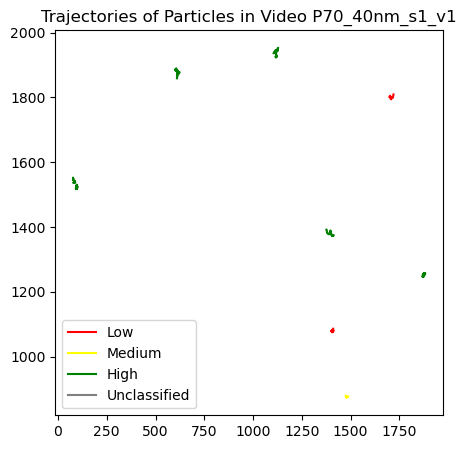

In [19]:
# Plot all trajectories for 1 video in 1 plot
import matplotlib.pyplot as plt

# Plot X and Y columns
plt.figure(figsize = (5,5))
    
plt.plot(low_Y['X'], low_Y['Y'], color='red', label='Low')
plt.plot(med_Y['X'], med_Y['Y'], color='yellow', label='Medium')
plt.plot(high_Y['X'], high_Y['Y'], color='green', label='High')
plt.plot(null_Y['X'], null_Y['Y'], color='grey', label='Unclassified')

plt.legend()
plt.title('Trajectories of Particles in Video ' + vid_code)
plt.show()

NameError: name 'df1' is not defined

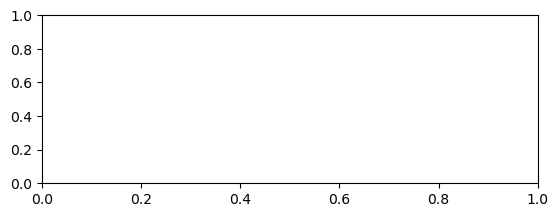

In [22]:
# Violin plot
plt.subplot(2, 1, 2)

plt.violinplot(, showmedians=True, showextrema=True)
plt.title('Violin Plot - Mass Distributions of Three Datasets')

In [118]:
# # Directory where the files are located
# directory = '/Users/khanhha/mpt-statistical-testing/MPTData/mpt/'

# # Create a dictionary to store files based on their tails
# file_pairs = {}

# # Iterate over each file in the directory
# for filename in os.listdir(directory):
#     if filename.startswith("features") and filename.endswith('.csv'):
#         # Extract the tail after 'features' and before '.csv'
#         tail = filename.split('_', 1)[1].split('.')[0]
#         # Store filename in the dictionary
#         file_pairs.setdefault(tail, []).append(filename)
        
#     elif filename.startswith('msd') and filename.endswith('.csv'):
#         # Extract the tail after 'msd' and before '.csv'
#         tail = filename.split('_', 1)[1].split('.')[0]
#         # Store the filename in the dictionary
#         file_pairs.setdefault(tail, []).append(filename)

# # Iterate over the pairs and create folders if they have more than 1 file
# for tail, filenames in file_pairs.items():
#     if len(filenames) >=2:
#         folder_name = os.path.join(directory, tail)
#         os.makedirs(folder_name, exist_ok = True)
#         for filename in filenames:
#             file_path = os.path.join(directory, filename)
#             destination_path = os.path.join(folder_name, filename)
#             shutil.move(file_path, destination_path)


In [10]:
df_feature = pd.read_csv('MPTData/mpt/P14_40nm_s1_v2/features_P14_40nm_s1_v2.csv')
df_msd = pd.read_csv('MPTData/mpt/P14_40nm_s1_v2/msd_P14_40nm_s1_v2.csv')

In [11]:
df_msd.columns

Index(['Unnamed: 0', 'Frame', 'Track_ID', 'X', 'Y', 'MSDs', 'Gauss', 'Quality',
       'SN_Ratio', 'Mean_Intensity'],
      dtype='object')

In [12]:
# df_feature[['alpha','Mean alpha']]
df_feature.columns

Index(['Unnamed: 0', 'Track_ID', 'alpha', 'D_fit', 'kurtosis', 'asymmetry1',
       'asymmetry2', 'asymmetry3', 'AR', 'elongation', 'boundedness',
       'fractal_dim', 'trappedness', 'efficiency', 'straightness', 'MSD_ratio',
       'frames', 'X', 'Y', 'Quality', 'Mean_Intensity', 'SN_Ratio', 'Deff1',
       'Deff2', 'angle_mean', 'angle_mag_mean', 'angle_var', 'convex_hull',
       'convex_hull_norm', 'dist_tot', 'dist_net', 'progression', 'Mean alpha',
       'Std alpha', 'Mean D_fit', 'Std D_fit', 'Mean kurtosis', 'Std kurtosis',
       'Mean asymmetry1', 'Std asymmetry1', 'Mean asymmetry2',
       'Std asymmetry2', 'Mean asymmetry3', 'Std asymmetry3', 'Mean AR',
       'Std AR', 'Mean elongation', 'Std elongation', 'Mean boundedness',
       'Std boundedness', 'Mean fractal_dim', 'Std fractal_dim',
       'Mean trappedness', 'Std trappedness', 'Mean efficiency',
       'Std efficiency', 'Mean straightness', 'Std straightness',
       'Mean MSD_ratio', 'Std MSD_ratio', 'Mean frames

In [63]:
df_json = pd.DataFrame(df_json)
df_json.shape

(1007, 1)